In [4]:
import math
import datetime
from matplotlib import pyplot as plt
from FinMind.Data import Load
import numpy as np
import json
TaiwanStockInfo = Load.FinData(dataset = 'TaiwanStockInfo')
  

stock_id=8088
some_days_ago=700

data = Load.FinData(dataset = 'TaiwanStockPrice',select = [str(stock_id)],date = str(datetime.date.today()-datetime.timedelta(days = some_days_ago)))

In [7]:
data

,date,Trading_Volume,Trading_money,open,max,min,close,spread,Trading_turnover,stock_id,update_time,create_time,rmax,rmin,local_max_or_not,local_min_or_not
0,2017-07-20,206,4586,22.50,22.50,22.15,22.30,-0.20,116,8088,2019-05-23 02:11:32,2019-06-15 11:14:25,22.30,21.85,True,False
1,2017-07-21,234,5192,22.15,22.30,22.00,22.30,0.00,130,8088,2019-05-23 02:11:32,2019-06-15 11:14:25,22.30,20.00,True,False
2,2017-07-24,119,2642,22.30,22.35,22.10,22.10,-0.20,57,8088,2019-05-23 02:11:32,2019-06-15 11:14:25,22.30,20.00,False,False
3,2017-07-25,228,5030,22.45,22.45,22.00,22.00,-0.10,109,8088,2019-05-23 02:11:32,2019-06-15 11:14:25,22.30,20.00,False,False
4,2017-07-26,196,4321,22.10,22.20,22.00,22.05,0.05,104,8088,2019-05-23 02:11:32,2019-06-15 11:14:25,22.30,20.00,False,False
5,2017-07-27,217,4799,22.05,22.20,22.05,22.10,0.05,113,8088,2019-05-23 02:11:32,2019-06-15 11:14:25,22.30,19.00,False,False
6,2017-07-28,265,5827,22.10,22.10,21.80,21.90,-0.20,150,8088,2019-05-23 02:11:32,2019-06-15 11:14:25,22.30,18.30,False,False
7,2017-07-31,128,2807,21.90,22.00,21.85,21.85,-0.05,84,8088,2019-05-23 02:11:32,2019-06-15 11:14:25,22.30,18.30,False,False
8,2017-08-01,228,5041,21.85,22.30,21.85,22.25,0.40,143,8088,2019-05-23 02:11:32,2019-06-15 11:14:25,22.30,18.30,False,False
9,2017-08-02,894,19650,22.30,22.35,21.80,22.00,-0.25,393,8088,2019-05-23 02:11:32,2019-06-15 11:14:25,22.30,18.30,False,False


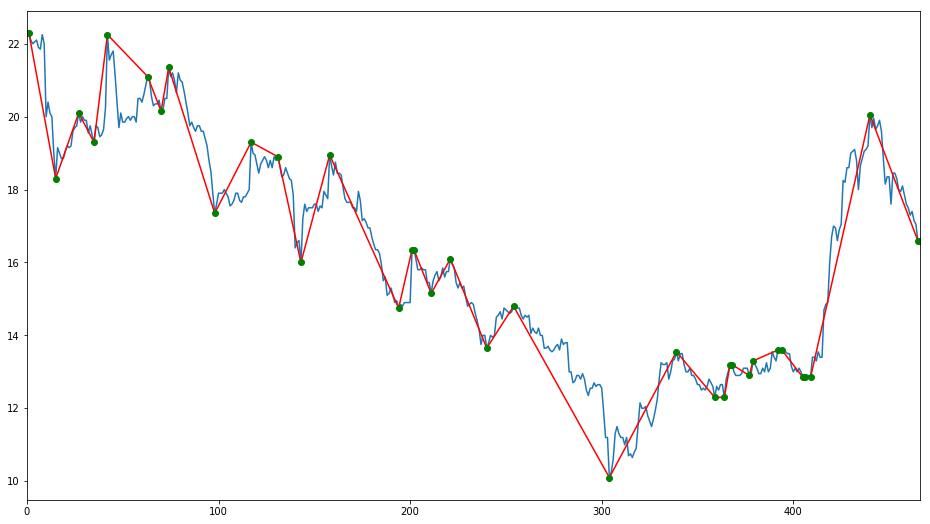

In [8]:
#####
def make_line(data,rolling_num=20):

    data['close'].plot(figsize=(16,9))
    #center 和 min_periods很重要
    data['rmax']=data['close'].rolling(rolling_num,min_periods=1,center=True).max()
    data['rmin']=data['close'].rolling(rolling_num,center=True,min_periods=1).min()   
#     data['rmax']=data['close'].rolling(rolling_num).max()
#     data['rmin']=data['close'].rolling(rolling_num).min()
    data['local_max_or_not']=data['rmax']==data['close']
    data['local_min_or_not']=data['rmin']==data['close']
#     data['critical']=np.logical_or(data['local_max_or_not'],data['local_min_or_not'])
    #找到重要的直
    s=[]
    end=0
    for i in data.itertuples():    
#         print(i[15],i[16])
        if i[15]==True or i[16]==True:
            
            s.append(i[0])
        
        if i[0]>end:
            end=i[0]        
    
#     s.append(18)
    plt.plot(data['close'][s],'r-')
    plt.plot(data['close'][s],'go')
    return s,data
result=make_line(data)
plt.show()
s=result[0]

In [9]:
#功能：判斷上升段 下降段
#有三種可能 上升 平 下降
del_list=[]
stat_record={}
stat_record_list=[]
for i in range(len(data['close'][s])-1):
    now_day=s[i]
    next_day=s[i+1]
    price_difference=data['close'][next_day]-data['close'][now_day]
    stat="non"
    if price_difference<0:
#         print("下降",price_difference)
        stat="down"   
    elif price_difference==0:
#         print("平",price_difference)
        stat="flat"
    elif price_difference>0:
#         print("上升",price_difference)
        stat="up"
    
    stat_record_list.append({"day_start":s[i],
                             "day_end":s[i+1],
                             "day_start_index":i,
                             "day_end_index":i+1,
                             "price":data['close'][now_day],
                             "stat":stat})
#合併
temp_raw=[]
final_raw=[]
#初始合併
for i in range(len(stat_record_list)):
    now=stat_record_list[i]
    #假如裡面沒東西 且 當前狀態不是flat
#     print(now['stat'])
    if len(temp_raw)==0:
        
        temp_raw.append(now['stat'])
        temp_raw.append(now)
        continue
    
    #假如有東西
    else:
        #如果現在的狀態跟上一個狀態不一樣且不是flat則
        if now['stat']!=temp_raw[0] and now['stat']!='flat':
            #輸出
            final_raw.append(temp_raw)
            #清空且如果當前狀態不是flat則填入新東西
            temp_raw=[]
            temp_raw.append(now['stat'])
            temp_raw.append(now)
        #如果現在的狀態跟上一個狀態一樣或是flat則
        elif now['stat']==temp_raw[0] or now['stat']=='flat':
            temp_raw.append(now)
        
#如果最後temp_raw還有東西的話就放進去
if len(temp_raw)>0:
    final_raw.append(temp_raw)

#最終合併
final_wave_list=[]
for i in final_raw:
    final_wave_list.append([i[0],i[1]['day_start'],i[-1]['day_end']])

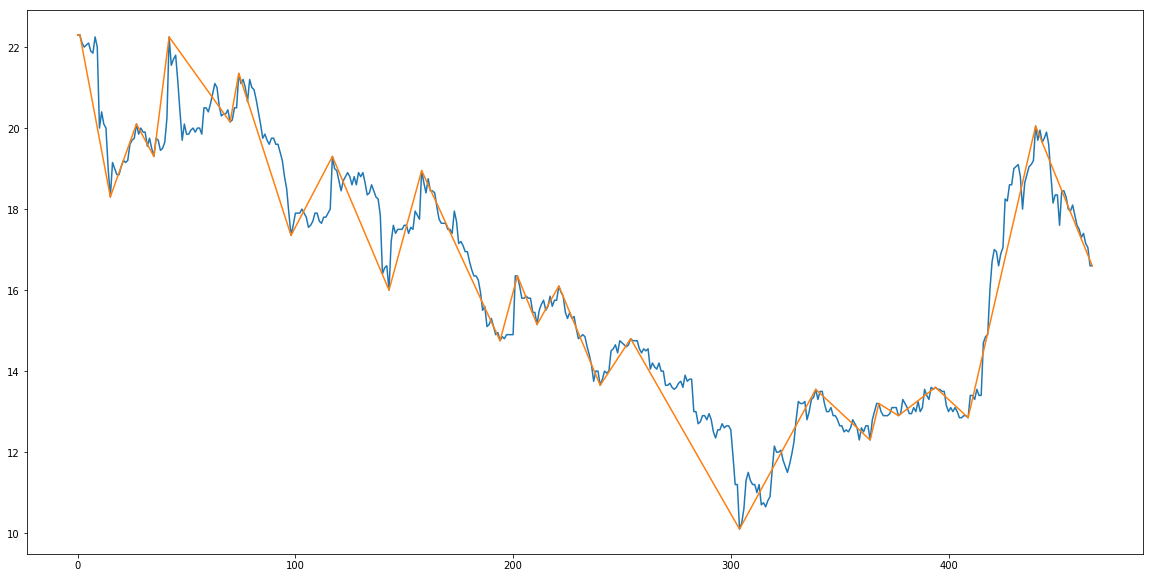

In [10]:
qk=[]
for i in final_wave_list:
    qk.append(i[1])
qk.append(final_wave_list[-1][2])
plt.figure(figsize=(20,10))
plt.plot(data['close'])
plt.plot(data['close'][qk])


In [11]:
final_wave_list2=[]
for i in final_wave_list:
    s=i[1]
    e=i[2]
    i.append(data['close'][e])
    i.append(data['close'][s])
    final_wave_list2.append(i)
final_wave_list2

[['flat', 0, 1, 22.3, 22.3],
 ['down', 1, 15, 18.3, 22.3],
 ['up', 15, 27, 20.1, 18.3],
 ['down', 27, 35, 19.3, 20.1],
 ['up', 35, 42, 22.25, 19.3],
 ['down', 42, 70, 20.15, 22.25],
 ['up', 70, 74, 21.35, 20.15],
 ['down', 74, 98, 17.35, 21.35],
 ['up', 98, 117, 19.3, 17.35],
 ['down', 117, 143, 16.0, 19.3],
 ['up', 143, 158, 18.95, 16.0],
 ['down', 158, 194, 14.75, 18.95],
 ['up', 194, 202, 16.35, 14.75],
 ['down', 202, 211, 15.15, 16.35],
 ['up', 211, 221, 16.1, 15.15],
 ['down', 221, 240, 13.65, 16.1],
 ['up', 240, 254, 14.8, 13.65],
 ['down', 254, 304, 10.1, 14.8],
 ['up', 304, 339, 13.55, 10.1],
 ['down', 339, 364, 12.3, 13.55],
 ['up', 364, 368, 13.2, 12.3],
 ['down', 368, 377, 12.9, 13.2],
 ['up', 377, 394, 13.6, 12.9],
 ['down', 394, 409, 12.85, 13.6],
 ['up', 409, 440, 20.05, 12.85],
 ['down', 440, 466, 16.6, 20.05]]

In [ ]:
import pandas as pd
col_name = ['state','start_day','end_day','end_price','start_price']
df=pd.DataFrame(final_wave_list,columns=col_name)
df['mid_price']=(df['start_price']+df['end_price'])/2
df['last_wave_mid']=df['mid_price'].shift(1)

In [ ]:
df

In [ ]:
d1=df['end_price']>df['last_wave_mid']
d2=df['state']=='down'
d3=np.logical_and(d1,d2)
df['type1']=d3
poket_list=df[df['type1']==True]
poket_list


In [32]:
earn_list=[]
lose_list=[]
for i in poket_list.iterrows():
    the_last_wave    =final_wave_list[i[0]-1]

    first_wave_mid   =i[1]['last_wave_mid']
    first_wave_high  =final_wave_list[i[0]-1][3]
    first_wave_gap   =(first_wave_high-first_wave_mid)*2
    nfactor          =0.8
    start_index      =i[1]['end_day']
    
    index            =start_index
    purchase         =False
    purchase_price   =0     
    while(index<=(len(data)-1)):
        now_price    =data['close'][index]
        index       +=1
        
        if(purchase):
            if -now_price+purchase_price>purchase_price*0.8:
                print('賠太多 殺出')
                lose_list.append([-now_price+purchase_price,now_price,start_index,index,first_wave_gap])
                break

            if now_price<first_wave_mid:
                print('波破壞 退出 認賠')
                losemoney=data['close'][start_index]-data['close'][index]
                print(losemoney)
                lose_list.append([losemoney,now_price,start_index,index,first_wave_gap])
                purchase         =False
                break
            elif (now_price-purchase_price)>first_wave_gap*nfactor:
                print('收手有賺錢 賺了',now_price-purchase_price,'現在價格',now_price)
                purchase         =False
                earn_list.append([now_price-purchase_price,now_price,start_index,index,first_wave_gap])
                break
        else:
            if now_price<first_wave_mid:
                print('波破壞 退出')
                break
            elif now_price>=first_wave_high:
                purchase       = True
                purchase_price = now_price
                print('type1發動---購買價格',purchase_price,'第一波漲幅',first_wave_gap)
                
earn_list=pd.DataFrame(earn_list,columns=['賺了','當前價格','買入日','賣出日','波一漲幅'])
lose_list=pd.DataFrame(lose_list,columns=['賠了','當前價格','買入日','賣出日','波一漲幅'])
lose_list
#建立五波段物件
#1.第一波中點 第一波高點 第二波end
#2.從第二波end開始找當價格超過第一波高點時買入 
#4.如果是持有狀態 如果當價格低於第一波中點時賣出 認賠
#5.如果是持有狀態 當漲勢是第一波的n倍時賣出


,賠了,當前價格,買入日,賣出日,波一漲幅


In [33]:
earn_list

,賺了,當前價格,買入日,賣出日,波一漲幅


In [5]:
#20190612可以的版本
#還要思考的地方，如果type1真的發動了 接下來要想辦法計算趨勢線 不能再用之前的波了 因為太小了 不合常理
#使用角度來判斷
import math

In [6]:
index=0
while(1):
    print(index)
    index+=1
    
    
    
    
    
    if index==len(final_wave_list)-1:
        print('close')
        break
            


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
close


In [ ]:
# for index in range(len(final_wave_list)):
#     day_object=final_wave_list[index]
#     if day_object[0]=='up':
#         #計算限制價格
#         ss=day_object[1]
#         e=day_object[2]
#         limit_price=(data['close'][ss]+data['close'][e])/2
#         print(limit_price)
#         
#         #取下一個波來檢查
index=0
while(1):
    day_object=final_wave_list[index]
    if day_object[0]=='up':
    #計算中點價格
        ss=day_object[1]
        e=day_object[2]
        limit_price=(data['close'][ss]+data['close'][e])/2
#         print('第一道波 中點價格',limit_price)
        
        #觀察第二個波的最低點是否有超過
        index+=1
        day_object2=final_wave_list[index]
        e2=day_object2[2]
#         print('第二個波的價格',data['close'][e2])
        
        if data['close'][e2]>limit_price:
#             print('type1發動',data['close'][e2],">",limit_price,final_wave_list[index],final_wave_list[next_index])
            print("第一波中間點",limit_price,'第一波最高點',data['close'][day_object[2]])
            print("第二波最低點",data['close'][e2])
            #找尋第三個波
            #第三個波的第一個值
        if index==len(final_wave_list)-1:
            print('close')
            break
            
            
            
#             third_wave_index=next_index+1
#             day_object3=final_wave_list[third_wave_index]
            
            
#             wave3_start=day_object3[1]
#             wave3_end  =day_object3[2]
#             print("第三波 start",wave3_start,"end",wave3_end)
            
#             no_first_bigger=True
#             for i in range(wave3_start,wave3_end+1):
#                 if data['close'][i]>data['close'][day_object[2]] and no_first_bigger:
#                     print(i,'天超越第一波最高點')
#                     print(i,'price is ',data['close'][i],'>',data['close'][day_object[2]])
#                     print('以',data['close'][day_object[2]],'購買')
#                     print('開始設定停損 該案例以20%最多只能賠',data['close'][day_object[2]]*0.2)
                    
                    
#                     y_max_tick=data['close'].max()
#                     y_min_tick=data['close'].min()
#                     gap= y_max_tick- y_min_tick
#                     biger_factor=x_max_tick/gap
                    
#                     x_max_tick=len(data)
                    
                    
                    
                    
#                     print('開始計算角度x',wave3_start,i,'轉換至',wave3_start*biger_factor,i*biger_factor)
#                     print('y',data['close'][wave3_start],data['close'][day_object[2]])
#                     ans=gap/(i*biger_factor-wave3_start*biger_factor)
#                     deg=math.degrees(math.atan(ans))
#                     print('tan=',deg)
#                     no_first_bigger=False
                    
                    
                    
            
#            # print("第三波 start_price",data['close'][wave3_start],"end",data['close'][wave3_end])
            
#             #在第三波中找到
            
            
#             if third_wave_index>len(final_wave_list)-1:
#                 break
#             day_object2=final_wave_list[third_wave_index]
            
#             e3=day_object2[2]
            
    
#             print('----------------')
    
    
    
    
#     index+=1
#     #如果index跑到最後面的時候
#     if index==len(final_wave_list)-1:
#         print('close')
#         break
        
        
        

In [132]:
#接收的是stat_record_list 的index 需要再把index轉換成object
#判斷第二波是否有低於第一波的終點
def inspect_2_step(day_object_index):
    try:
        day_object=stat_record_list[day_object_index]
#         print(day_object)
        if day_object['stat']=="up":
            return "no success"
        elif day_object['stat']=="down":
            end_index=day_object["day_end"]
            type1_buy_price=data['close'][end_index]
            return {"index":day_object_index,"day_start":day_object['day_start'],"day_end":day_object['day_end'],"type1_price":type1_buy_price}
        elif day_object['stat']=="flat":
            return inspect_2_step(day_object_index+1)
    except:
        return 'wrong'
    

In [187]:
#功能 抓出up down up
buy_day_list=[]
for i in stat_record_list:
    #當前index
    if i['stat']=="up":    
        #檢查下一個index的目標狀態是否為down 如果為flat就繼續檢查下去 如果為up則回傳失敗
        res=inspect_2_step(i['day_start_index']+1)
        if res=='no success':
            print('無發動')
        #如果是down的話 res會是dict
        elif type(res)==dict:
            #開始價格的index
            s_index=i['day_start']
            #結束價格的index
            e_index=i['day_end']
            #門檻的價格 目前是取1/2 以後可以改相關的參數
            limit_price=(data['close'][s_index]+data['close'][e_index])/2
            limit_price=limit_price
#             print(data['close'][s_index],data['close'][e_index],limit_price)
            
            #判斷是否下降波段的最低點是否有有低於中間點 如果低於中間點的話則type1失敗
            if limit_price<res['type1_price']:
                print("type1成功 進入候選名單")
                index=res['index']
                print("第一波",stat_record_list[i['day_start_index']])
                print("第二波",stat_record_list[index])
#                 print(i['day_start'],res['day_end'],limit_price,res['type1_price'])
                print("買點",stat_record_list[index]['day_end'])
                buy_day_list.append(stat_record_list[index]['day_end'])
                #type1成功 檢查第三波 第四波是否成功
            else:
                pass
            
            


無發動
type1成功 進入候選名單
第一波 {'day_start': 17, 'day_end': 24, 'day_start_index': 7, 'day_end_index': 8, 'price': 241.5, 'stat': 'up'}
第二波 {'day_start': 25, 'day_end': 26, 'day_start_index': 9, 'day_end_index': 10, 'price': 254.0, 'stat': 'down'}
買點 26


In [186]:
#已經知道買點了
#有些點要注意 後面的type1可能是前面的type2如果最後波結束 如果目前的type1 是上個波的type2則失敗
#現在開始等獲利 如果
buy_day_list

[4, 15, 26, 39, 42, 65]

In [3]:
def get_slope(x,y):
    
    s1=x
    n1=np.array(y)
    
    s1=np.array(s)
    s2=s1[1:]#x後項
    s3=s1[:-1]#x前
    s4=s2-s3#後項減前項

    n2=n1[1:]#值得後項
    n3=n1[:-1]#值得前項
    n4=n2-n3
    
    slope=n4/s4
    
    return slope

In [4]:
get_slope(s,data['close'][s])

array([ 0.04923077, -0.054     ,  0.02375   ,  0.        , -0.1525    ,
        0.09866667,  0.        , -0.1575    , -0.06222222,  0.045     ])

In [5]:

def get_wave(x,slope):
    
    stack=[]
    s3=x
    wave_list=[]
    for i,k in zip(slope,s3):
        if len(stack)==0:
            if i >0:
                stack.append([i,k])

        else:#stack內有放東西了
            if i==0:
                if stack[-1][0]>0:
                    stack.append([i,k])
            elif i<0:
                
                if stack[-1][0]<0:
                    stack.append([i,k])
                
                else:
                    stack.append([i,k])
                    wave_list.append(stack)
                    stack=[]
            elif i>0:
                stack.append([i,k])
    wave_list.append(stack)
    
    return wave_list


In [6]:
wave_list=get_wave(s,get_slope(s,data['close'][s]))

In [7]:
wave_list

[[[0.0492307692307692, 0], [-0.05400000000000009, 13]],
 [[0.02375000000000005, 18], [0.0, 26], [-0.15250000000000008, 27]],
 [[0.0986666666666667, 31], [0.0, 46], [-0.15749999999999997, 47]],
 [[0.04499999999999993, 60]]]

In [8]:
class stock_cal:
        def __init__(self,data):
            self.data=data
            self.s=make_line(data)
            self.slope=get_slope(self.s,data['close'][self.s])
        def make_line(self,rolling_num=12):
            
            data=self.data
            data['close'].plot(figsize=(16,9))
            #center 和 min_periods很重要
            data['rmax']=data['close'].rolling(rolling_num,min_periods=1,center=True).max()
            data['rmin']=data['close'].rolling(rolling_num,center=True,min_periods=1).min()
            data['local_max_or_not']=data['rmax']==data['close']
            data['local_min_or_not']=data['rmin']==data['close']
            data['critical_point']=data['local_max_or_not' or 'local_min_or_not']
            data['local_min_or_not'][len(data)-1]=True
            #data[['local_max_or_not']].iloc[59]=True
            #找到重要的直
            s=[]
            for i in data.itertuples():

                if i[13]==True or i[14]==True:

                    s.append(i[0])
            plt.plot(data['close'][s],'r-')
            self.data=data
            return s
        def get_slope(x,y):
    
            s1=x
            n1=np.array(y)

            s1=np.array(s)
            s2=s1[1:]#x後項
            s3=s1[:-1]#x前
            s4=s2-s3#後項減前項

            n2=n1[1:]#值得後項
            n3=n1[:-1]#值得前項
            n4=n2-n3

            slope=n4/s4

            return slope
        def get_wave(self,x,slope):
            
            
            
            stack=[]
            s3=x
            wave_list=[]
            for i,k in zip(slope,s3):
                if len(stack)==0:
                    if i >0:
                        stack.append([i,k])

                else:#stack內有放東西了
                    if i==0:
                        if stack[-1][0]>0:
                            stack.append([i,k])
                    elif i<0:

                        if stack[-1][0]<0:
                            stack.append([i,k])

                        else:
                            stack.append([i,k])
                            wave_list.append(stack)
                            stack=[]
                    elif i>0:
                        stack.append([i,k])
            wave_list.append(stack)

            return wave_list

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


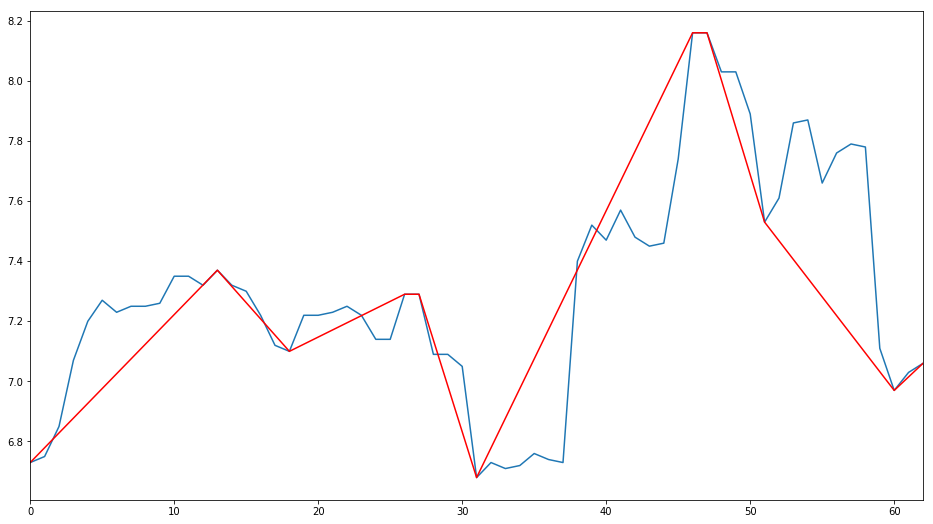

In [9]:
d1=stock_cal(data)